# 7. Single-layer Neural Network with Pattern images based on Lengyel-Epstein model
- X : imges, Z = W1 * gradient(X) + W2 * X + b
- optimizer : Adam

## 1) Import Packages

In [1]:
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import math
import sklearn.metrics as metrics

In [2]:
# Make dataset(144)
x_orig = []
y_orig = np.zeros((1,48))
for i in range(1,145):
    if i <= 48 :
        folder = 0
    elif i <=96 :
        folder = 1
    else:
        folder = 2

    img = Image.open('144/{0}/pattern_{1}.jpg'.format(folder,i)) 
    data = np.array(img)
    x_orig.append(data)

for i in range(1,3):
    y_orig = np.append(y_orig, np.full((1, 48),i), axis = 1)

In [36]:
# Make dataset(360)
x_orig = []
y_orig = np.zeros((1,120))
for i in range(1,361):
    if i <= 120 :
        folder = 0
    elif i <=240 :
        folder = 1
    else:
        folder = 2

    img = Image.open('360/{0}/pattern_{1}.jpg'.format(folder,i)) 
    data = np.array(img)
    x_orig.append(data)

for i in range(1,3):
    y_orig = np.append(y_orig, np.full((1, 120),i), axis = 1)

In [53]:
# Make dataset(720)
x_orig = []
y_orig = np.zeros((1,240))
for i in range(1,721):
    if i <= 240 :
        folder = 0
    elif i <=480 :
        folder = 1
    else:
        folder = 2

    img = Image.open('720/{0}/pattern_{1}.jpg'.format(folder,i)) 
    data = np.array(img)
    x_orig.append(data)

for i in range(1,3):
    y_orig = np.append(y_orig, np.full((1, 240),i), axis = 1)

In [70]:
# Explore dataset
x_orig = np.array(x_orig)
print(x_orig.shape)
print(y_orig.shape)  

(1440, 64, 64)
(1, 1440)


In [71]:
# Random shuffle
s = np.arange(x_orig.shape[0])
np.random.shuffle(s)

x_shuffle = x_orig[s,:]
y_shuffle = y_orig[:,s]

print(x_shuffle.shape)
print(y_shuffle.shape)
# y_shuffle

(1440, 64, 64)
(1, 1440)


In [72]:
# Split train and test datasets
x_train_orig, x_test_orig, y_train_orig, y_test_orig = train_test_split(x_shuffle,y_shuffle.T, 
                                                                        test_size=0.3,  shuffle=True, random_state=1000)

In [73]:
print(x_train_orig.shape)
print (y_train_orig.shape)
print(sum(y_train_orig==0))
print(sum(y_train_orig==1))
print(sum(y_train_orig==2))

(1008, 64, 64)
(1008, 1)
[343]
[332]
[333]


In [74]:
# Flatten the training and test images
x_train_flatten = x_train_orig.reshape(x_train_orig.shape[0], -1).T
x_test_flatten = x_test_orig.reshape(x_test_orig.shape[0], -1).T

# Normalize image vectors
x_train = x_train_flatten/255.
x_test = x_test_flatten/255.

# Convert training and test labels to one hot matrices
enc = OneHotEncoder()
y1 = y_train_orig.reshape(-1,1)
enc.fit(y1)
y_train = enc.transform(y1).toarray()
y_train = y_train.T

y2 = y_test_orig.reshape(-1,1)
enc.fit(y2)
y_test = enc.transform(y2).toarray()
y_test = y_test.T

# Explore dataset 
print ("number of training examples = " + str(x_train.shape[1]))
print ("number of test examples = " + str(x_test.shape[1]))
print ("x_train shape: " + str(x_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("x_test shape: " + str(x_test.shape))
print ("y_test shape: " + str(y_test.shape))

number of training examples = 1008
number of test examples = 432
x_train shape: (4096, 1008)
y_train shape: (3, 1008)
x_test shape: (4096, 432)
y_test shape: (3, 432)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

## 3) Define required functions

In [75]:
def initialize_parameters(nx, ny):
    """
    Argument:
        nx -- size of the input layer (4096)
        ny -- size of the output layer (3)
    
    Returns:
        W -- weight matrix of shape (ny, nx)
        b -- bias vector of shape (ny, 1)

    """   
    np.random.seed(1)

    W1 = np.random.randn(ny,nx)*0.01
    W2 = np.random.randn(ny,nx)*0.01
    b = np.zeros((ny,1))

    assert(W1.shape == (ny, nx))
    assert(W2.shape == (ny, nx))
    assert(b.shape == (ny, 1))

    
    return W1, W2, b  

In [76]:
def softmax(Z):
    # compute the softmax activation
    
    S = np.exp(Z + np.max(Z)) / np.sum(np.exp(Z + np.max(Z)), axis = 0)
    
    return S

In [77]:
def classlabel(Z):
    # probabilities back into class labels
    y_hat = Z.argmax(axis=0)
    
    return y_hat

In [78]:
def gradient_vec(X):
    g_X_r = np.gradient(X, axis = 1)
    g_X_c = np.gradient(X, axis = 0)
    g_X = g_X_r**2 + g_X_c**2
    return g_X

In [79]:
a = gradient_vec(x_train)
a.shape

(4096, 1008)

In [80]:
def propagate(W1,W2, b, X, Y):

    m = X.shape[1]
#     n = Y.shape[0]
    
    # Forward Propagation
    Z = np.dot(W1, gradient_vec(X))+ (np.dot(W2,X)+b)
    A = softmax(Z)     # compute activation
    
    cost = (-1/m) * np.sum(Y * np.log(A))  # compute cost (Cross_entropy)
    
    # Backward propagation   
    dW1 = (1/m) * (np.dot(gradient_vec(X),(A-Y).T)).T
    dW2 = (1/m) * (np.dot(X,(A-Y).T)).T
    db = (1/m) * (np.sum(A-Y))
    
#     assert(dW.shape == W.shape)
#     assert(db.dtype == float)
#     cost = np.squeeze(cost)
#     assert(cost.shape == (Y.shape[0],1))
    
    grads = {"dW1": dW1,
             "dW2" : dW2,
             "db": db}
    
    return grads, cost

## 4) Single-2weight Layer Neural Network with Adam

In [81]:
def optimize(X, Y, num_iterations, learning_rate, t, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, print_cost = False):

    costs = []
    W1, W2, b = initialize_parameters(4096,3)
     # initialize with adam
    v_dW1 = np.zeros((W1.shape[0],W1.shape[1]))
    v_dW2 = np.zeros((W2.shape[0],W2.shape[1]))
    v_db = np.zeros((b.shape[0],b.shape[1]))
    
    s_dW1 = np.zeros((W1.shape[0],W1.shape[1]))
    s_dW2 = np.zeros((W2.shape[0],W2.shape[1]))
    s_db = np.zeros((b.shape[0],b.shape[1]))
    
    for i in range(num_iterations):

        grads, cost = propagate(W1,W2, b, X, Y)

        dW1 = grads["dW1"]
        dW2 = grads["dW2"]
        db = grads["db"]
        
        # update parameters with adam
        v_dW1 = beta1 * v_dW1 + (1-beta1) * dW1
        v_dW2 = beta1 * v_dW2 + (1-beta1) * dW2
        v_db = beta1 * v_db + (1-beta1) * db

        # Compute bias-corrected first moment estimate
        v_corrected_dW1 = v_dW1 / (1-beta1**t)
        v_corrected_dW2 = v_dW2 / (1-beta1**t)
        v_corrected_db = v_db / (1-beta1**t)
        
        # Moving average of the squared gradients
        s_dW1 = beta2 * s_dW1 + (1-beta2) * dW1 ** 2
        s_dW2 = beta2 * s_dW2 + (1-beta2) * dW2 ** 2
        s_db = beta2 * s_db + (1-beta2) * db ** 2

        # Compute bias-corrected second raw moment estimate.
        s_corrected_dW1 = s_dW1 / (1-beta2**t)
        s_corrected_dW2 = s_dW2 / (1-beta2**t)
        s_corrected_db = s_db / (1-beta2**t)

        # Update parameters
        W1 = W1 - (learning_rate) * ((v_corrected_dW1) / (s_corrected_dW1 **(1/2) + epsilon))
        W2 = W2 - (learning_rate) * ((v_corrected_dW2) / (s_corrected_dW2 **(1/2) + epsilon))
        b = b - (learning_rate) * ((v_corrected_db) / (s_corrected_db ** (1/2) + epsilon))

        # Record the costs for plotting
        if i % 200 == 0:
            costs.append(cost)
            
        # Print the cost every 100 training iterations
        if print_cost and i % 200 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per 200)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    # Lets save the trainded parameters in a variable
    params = {"W1": W1,
              "W2": W2,
              "b": b}    
    grads = {"dW1": dW1,
             "dW2":dW2,
             "db": db}
    
    return params, grads, costs

Cost after iteration 0: 1.095678
Cost after iteration 200: 12.664003
Cost after iteration 400: 0.955016
Cost after iteration 600: 0.377431
Cost after iteration 800: 0.317457
Cost after iteration 1000: 0.278037
Cost after iteration 1200: 0.255944


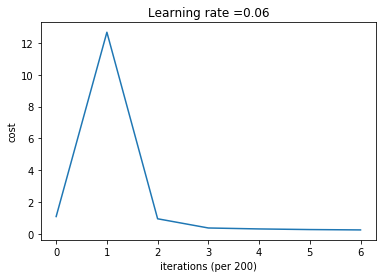

W1 = [[ 0.81349117 -0.19220398 -0.7878607  ...  0.36504411  0.06861399
  -0.34905584]
 [-0.06010139  0.05417729  0.62319032 ... -0.53762137 -0.38884774
   0.24419687]
 [-0.67299846  0.29877986  0.32778676 ...  0.23710955  0.41579735
   0.25098491]]
W2 = [[-0.11023509  0.05416188  0.00475998 ...  0.03401764  0.04540081
  -0.00026561]
 [ 0.06076452  0.00064384  0.02175257 ...  0.16270174  0.06790461
   0.05669415]
 [ 0.14701128  0.03663742  0.04651135 ... -0.0654719  -0.03804284
   0.02753162]]
b = [[1.63724866e-12]
 [1.63724866e-12]
 [1.63724866e-12]]


In [83]:
params, grads, costs = optimize(x_train, y_train, num_iterations=1400, learning_rate=0.06,
                                t=2, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-4, print_cost = True)

print ("W1 = " + str(params["W1"]))
print ("W2 = " + str(params["W2"]))
print ("b = " + str(params["b"]))

## 5) Accuracy Analysis

In [84]:
def predict(W1,W2, b, X) :
    '''
    Predict the label(0,1,2) using argmax
    
    Arguments:
    X : data of size (num_px * num_px, number of examples)
    
    Returns:
    y_prediction : predictions (0/1/2) for the examples(my_image)
    '''
    
    m = X.shape[1]
    
    # Compute "A" predicting the probabilities
    Z = np.dot(W1, gradient_vec(X))+ (np.dot(W2,X)+b)
    A = softmax(Z)     # compute activation

    # Convert probabilities A to actual predictions
    y_prediction = A.argmax(axis=0)
    
#     assert(y_prediction.shape == (1, m))
    
    return y_prediction

In [85]:
# Predict test/train set
W11 = params['W1']
W22 = params['W2']
b11= params['b']

y_prediction_train = predict(W11,W22, b11, x_train)
y_prediction_test = predict(W11,W22, b11, x_test)

print(y_prediction_train)
print(y_prediction_test)

# Print train/test Errors
print("train accuracy : ", metrics.accuracy_score(y_prediction_train, y_train_orig))
print("test accuracy : ", metrics.accuracy_score(y_prediction_test, y_test_orig))

[0 1 1 ... 1 0 2]
[1 0 2 0 2 2 0 0 0 0 1 1 0 2 0 1 0 0 0 0 0 2 1 0 0 0 2 0 1 0 0 2 1 0 2 0 0
 1 0 0 0 2 0 0 2 1 2 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 2 2 1 0 1 1 1
 2 0 2 1 1 2 2 1 2 1 2 2 1 0 1 0 0 1 0 2 0 0 1 1 0 1 0 1 1 0 1 2 0 0 0 0 0
 2 1 0 2 2 2 0 0 2 0 1 2 0 2 0 0 2 0 2 0 0 0 0 2 0 2 0 0 1 0 0 0 2 2 0 0 0
 2 1 1 1 0 2 0 1 0 1 0 0 1 0 0 0 0 0 2 0 2 0 0 0 1 0 0 1 0 1 2 1 2 1 0 2 0
 1 0 0 0 0 0 1 0 2 1 0 2 1 2 1 0 1 2 0 2 0 1 0 0 1 2 0 2 0 0 0 0 2 0 0 0 0
 1 1 0 0 0 0 1 0 1 2 1 1 0 0 0 1 0 0 2 0 0 0 0 0 0 2 0 1 2 1 1 0 0 0 0 2 0
 1 0 2 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 2 0 1 2 2 1 2 2 0 0 1 0 1 0
 2 2 0 0 0 0 0 0 0 1 2 0 2 0 0 0 0 0 2 1 0 1 0 1 0 2 0 0 1 1 0 1 0 0 0 1 1
 0 0 0 2 1 1 0 2 0 1 2 0 1 0 1 0 1 0 0 0 2 0 1 1 0 1 0 1 0 2 2 0 2 1 0 0 0
 1 2 1 0 1 0 0 1 1 0 1 1 2 1 2 2 1 0 0 2 0 2 0 1 2 0 1 1 0 0 2 2 2 1 2 0 2
 2 0 0 0 1 0 0 0 2 1 0 1 0 1 1 0 1 2 2 1 1 2 1 0 1]
train accuracy :  0.9613095238095238
test accuracy :  0.4027777777777778
